In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pytides.tide import Tide
from datetime import datetime
from scipy.optimize import curve_fit

In [2]:
gage_data = pd.read_csv('h833a.csv', parse_dates=True)
#gage_data.head()

In [3]:
# replace missing values w NaN

gage_data = gage_data.replace(-32767, np.NaN)

In [4]:
# convert to datetime format

timeseries = pd.to_datetime(gage_data[['year', 'month', 'day', 'hour']])

# add datetime object to DataFrame
# and reindex by datetime

gage_data['datetime'] = timeseries
#gage_data = gage_data.set_index('datetime')

gage_data.head()

,year,month,day,hour,height,datetime
0,1963,10,17,5,530.0,1963-10-17 05:00:00
1,1963,10,17,6,650.0,1963-10-17 06:00:00
2,1963,10,17,7,970.0,1963-10-17 07:00:00
3,1963,10,17,8,1380.0,1963-10-17 08:00:00
4,1963,10,17,9,1870.0,1963-10-17 09:00:00


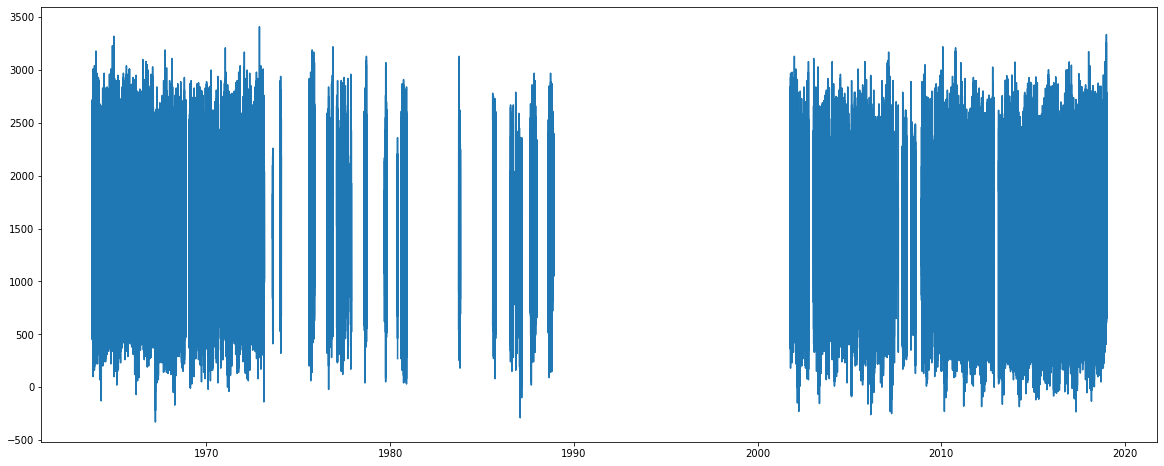

In [6]:
# plot the data

fig, ax = plt.subplots(figsize=(20,8))

ax.plot(gage_data['datetime'], gage_data['height'])

plt.show()

In [7]:
# find the mean for the entire array

h_0 = np.mean(gage_data['height'])
#h_0 

# h_0 = 1431.1514184840478

In [8]:
# subtract h_0 from each value in array
# create new array h_mean_corr with corrected values

h_mean_corr = gage_data['height']-h_0

# add mean corrected gage heights to the DataFrame
gage_data['h_mean_corr'] = h_mean_corr

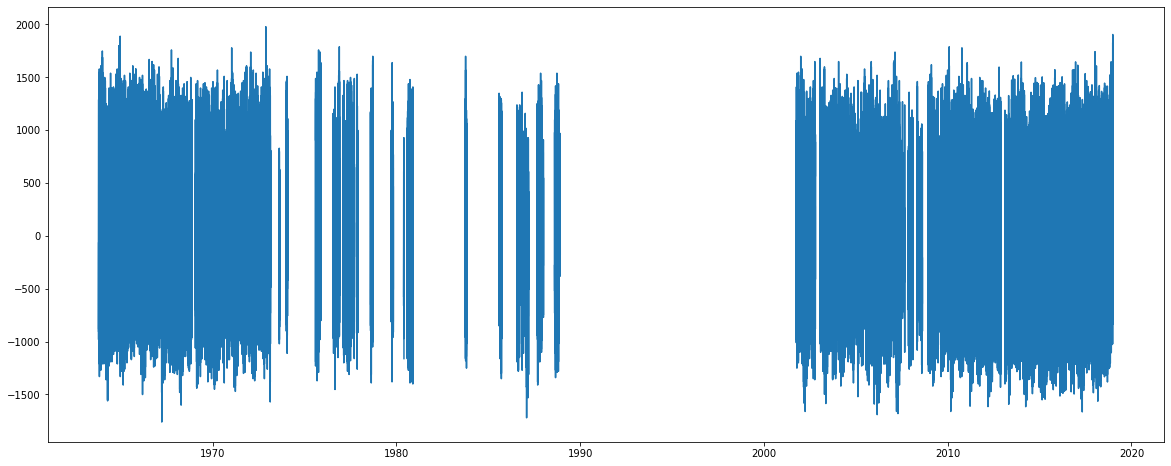

In [13]:
# check that the data is centered on 0

fig, ax = plt.subplots(figsize=(20,8))

ax.plot(gage_data['datetime'], gage_data['h_mean_corr'])

plt.show()

In [14]:
# arbitrarily define a range of dates to view in the timeseries

lim_min = datetime(1963, 10, 17, 5)
lim_max = datetime(1973, 3, 1, 3)

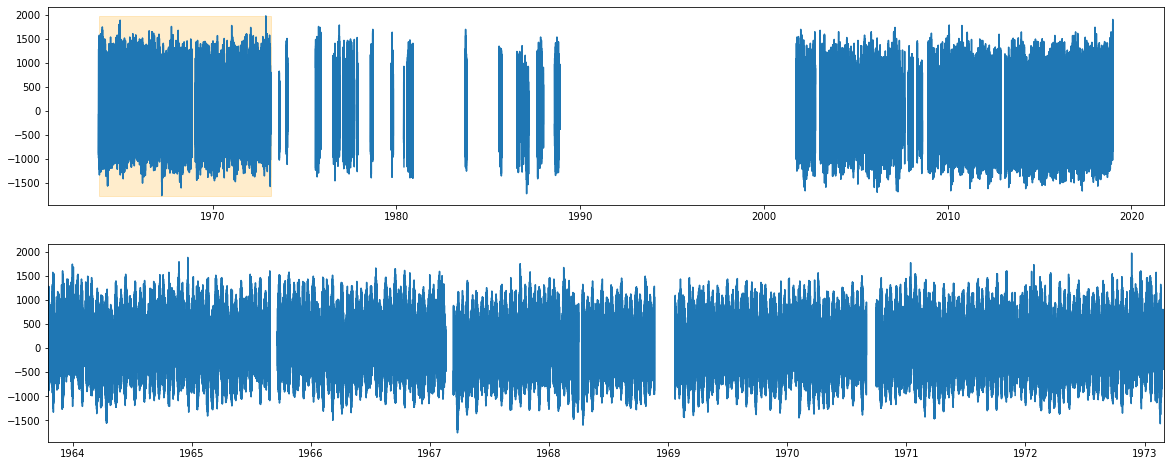

In [15]:
fig, (ax, ax1) = plt.subplots(2, 1, figsize=(20,8))


# full timeseries fig
ax.plot(gage_data['datetime'], gage_data['h_mean_corr'])

# shade region corresponding to the zoomed in plot
xlims = (lim_min, lim_max)
ax.fill_between(xlims, gage_data['h_mean_corr'].min(), gage_data['h_mean_corr'].max(), 
                alpha=0.2, color='orange')

#zoomed in
ax1.plot(gage_data['datetime'], gage_data['h_mean_corr'])
ax1.set_xlim(lim_min, lim_max)

plt.show()

In [37]:
# find the index value corresponding to lim_min & lim_max

gage_data.index[gage_data['datetime'] == lim_max].tolist()

[82150]

In [38]:
# create first chunk 

first_chunk = gage_data.loc[0:82150, :]

In [39]:
# check the chunk

first_chunk.tail()

,year,month,day,hour,height,datetime,h_mean_corr
82146,1973,2,28,23,1470.0,1973-02-28 23:00:00,38.848582
82147,1973,3,1,0,1280.0,1973-03-01 00:00:00,-151.151418
82148,1973,3,1,1,1100.0,1973-03-01 01:00:00,-331.151418
82149,1973,3,1,2,990.0,1973-03-01 02:00:00,-441.151418
82150,1973,3,1,3,1030.0,1973-03-01 03:00:00,-401.151418


In [40]:
# linear change in x with b intercept

def linear_fit(x, m, b):
    """Calculate linear change in *x*
    
    Parameters
    ----------
    x : float ndarray
        The x-values.
    m : float or 1-element float ndarray
        The rate of growth.
    b : float or 1-element float ndarray
        The intercept.
    
    Returns
    -------
    float ndarray
        The fitted y-values.
    
    """
    return m * x + b

In [50]:
model_fit_x = np.linspace(0,1,len(first_chunk))
model_fit_y = first_chunk['h_mean_corr']

In [51]:
# scipy.optimize.curve_fit handles NaN by returning all parameters as 1.0
# boolean indexing to exclude NaNs, source: https://stackoverflow.com/questions/33876226/scipy-curve-fit-fails-on-easy-linear-fit

valid = ~(np.isnan(model_fit_y))

In [52]:
# Use non-linear least squares to fit a function, linear_fit, to data.
# returns popt: parameters that minimize least squares regression
# returns pcov: covariance

popt, pcov = curve_fit(linear_fit, model_fit_x, model_fit_y[valid])
popt

ValueError: operands could not be broadcast together with shapes (82151,) (77855,) 

In [ ]:
# UGH it IS getting rid of the NaN values and shortening the array

In [53]:
len(first_chunk['h_mean_corr'])

82151

In [54]:
len(model_fit_y)

82151

In [55]:
len(model_fit_x)

82151

In [56]:
len(model_fit_y[valid])

77855

In [ ]:
# plotting booleans, not values

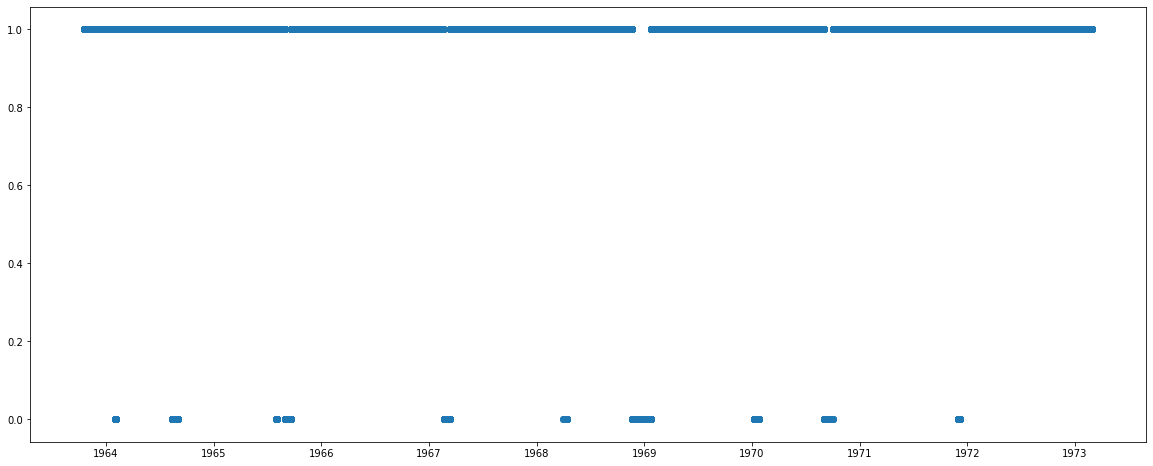

In [58]:
fig, ax = plt.subplots(figsize=(20,8))

ax.scatter(first_chunk['datetime'], mask_NaN)

#ax.plot(first_chunk['datetime'], linear_fit(model_fit_x, *popt), 'r-',
        # label='fit: a=%5.3f, b=%5.3f' % tuple(popt))

plt.show()